In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from sklearn.datasets import fetch_lfw_people

In [4]:
faces=fetch_lfw_people(min_faces_per_person=70)

In [5]:
faces.target_names


array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [6]:
len(faces.target_names)

7

In [7]:
faces.target


array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

In [8]:
np. unique (faces.target)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

'Colin Powell'

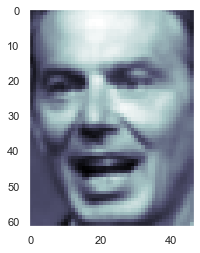

In [10]:
plt.grid(False)
plt.imshow(faces.images[1], cmap='bone')
faces.target_names[1]

In [11]:
faces. images[0].shape

(62, 47)

In [12]:
X = faces.data

In [13]:
X.shape

(1288, 2914)

In [14]:
y=faces.target

In [15]:
y.shape

(1288,)

In [16]:
y[100]

3

'George W Bush'

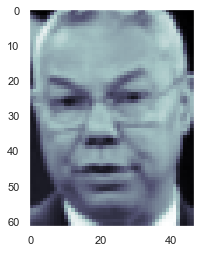

In [17]:
plt.grid(False)
plt.imshow(faces.images[y [100]], cmap='bone')


faces.target_names [y [100]]

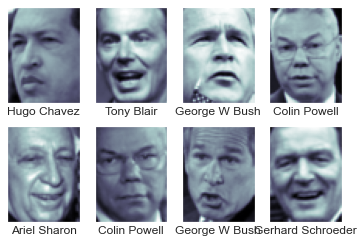

In [18]:
fig, ax = plt.subplots(2,4) 
for idx, axidx in enumerate(ax. flat): 
    axidx.imshow(faces.images[idx], cmap = 'bone') 
    axidx.set(xticks=[],yticks=[], xlabel=faces.target_names[faces.target[idx]])

In [19]:
from sklearn.model_selection import train_test_split 
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [34]:
idx= np.random.randint(ytest.size)

xt= Xtest[idx]
nnidx=np.argmin(((Xtrain-xt)**2).sum(axis=1))

y_pred=ytrain[nnidx]

y_true= ytest[idx] 

print (y_true,y_pred)

3 3


In [28]:
from sklearn.svm import SVC 

m = SVC (gamma= 'auto', kernel = 'rbf')

m.fit(Xtrain, ytrain)

y_pred = m.predict(Xtest)

acc = 100*((y_pred==ytest).sum()/ytest.size) 

print("Acc is ", acc,"%")

Acc is  45.348837209302324 %


In [23]:
from sklearn.decomposition import PCA 

from sklearn.pipeline import make_pipeline

In [24]:
mPca=PCA(n_components=300)

mSvm = SVC(gamma= 'auto',kernel='rbf')

m = make_pipeline(mPca, mSvm) 

m.fit(Xtrain, ytrain)

y_pred = m.predict(Xtest) 

acc = 100*((y_pred == ytest).sum()/ytest.size)

print("Acc is ", acc,"%")

Acc is  45.348837209302324 %


In [25]:
from sklearn.ensemble import RandomForestClassifier 

mR = RandomForestClassifier (n_estimators = 30)

mR.fit(Xtrain, ytrain) 

y_pred = mR.predict(Xtest)

acc = 100*((y_pred == ytest).sum()/ytest.size)

print("Acc is ", acc,"%")

Acc is  63.95348837209303 %
